In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [23]:
df = pd.read_csv('anes_affect.csv')

In [24]:
print(df['year'].nunique())
print(df['party_3_point'].value_counts())
print(len(df['party_3_point']))
print(df['year'][0])
print(df['year'].unique())

12
1.0    7137
3.0    6294
Name: party_3_point, dtype: int64
13431
1984
[1984 1986 1988 1990 1992 1996 2000 2004 2008 2012 2016 2020]


In [25]:
y_values_REP = []
y_values_DEM = []

df1984 = df.loc[df['year'] == 1984]
df1986 = df.loc[df['year'] == 1986]
df1988 = df.loc[df['year'] == 1988]
df1990 = df.loc[df['year'] == 1990]
df1992 = df.loc[df['year'] == 1992]
df1996 = df.loc[df['year'] == 1996]
df2000 = df.loc[df['year'] == 2000]
df2004 = df.loc[df['year'] == 2004]
df2008 = df.loc[df['year'] == 2008]
df2012 = df.loc[df['year'] == 2012]
df2016 = df.loc[df['year'] == 2016]
df2020 = df.loc[df['year'] == 2020]
lst = [df1984, df1986, df1988, df1990, df1992, df1996, df2000, df2004, df2008, df2012, df2016, df2020]
lst2 = []
total = 0
for x in lst:
    total += len(x)
    lst2.append(total)


def func(dfTemp, prev=0):
    temp_dem = 0
    temp_rep = 0
    vc_dem = dfTemp.loc[dfTemp['party_3_point'] == 1]
    vc_rep = dfTemp.loc[dfTemp['party_3_point'] == 3]
    for x in range(len(dfTemp)):
        if dfTemp['party_3_point'][x + prev] == 1:
            temp_dem += dfTemp['affect'][x + prev] * dfTemp['weight_full'][x + prev]
        else:
            temp_rep += dfTemp['affect'][x + prev] * dfTemp['weight_full'][x + prev]
    return temp_dem/len(vc_dem), temp_rep/len(vc_rep)

y_values_DEM.append(func(df1984)[0])
y_values_REP.append(func(df1984)[1])
for x in range(1, len(lst)):
    y_values_DEM.append(func(lst[x], lst2[x-1])[0])
    y_values_REP.append(func(lst[x], lst2[x-1])[1])
print(y_values_DEM)
print(y_values_REP)

[-0.24166666666666667, -0.19047619047619047, -0.03773584905660377, -0.03225806451612903, 0.2044714777777779, -0.08429477896551729, -0.13839738816176475, 0.0721605339, 0.10606128576086958, 1.373752350558048, -0.07724215624999996, 0.24459176738039973]
[-0.045112781954887216, 0.16, 0.2971014492753623, -0.078125, 0.1398216643283582, -0.07559108, -0.17694594625850346, 0.6487263285964913, -0.12443104686567161, 1.2605593223910245, 0.0602418184818482, 0.10380178565690837]


Text(1978, -0.45, 'b)')

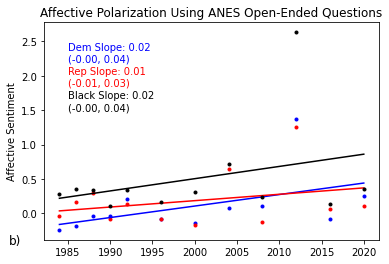

In [56]:
x = df['year'].unique()

plt.plot(x, y_values_DEM, marker = '.', linestyle='None', color = 'b')
plt.plot(x, y_values_REP, marker = '.', linestyle='None', color = 'r')

mD, bD, _D, pD, eD = st.linregress(x, y_values_DEM)
lci_D, uci_D = mD - 1.96 * eD,  mD + 1.96 * eD
plt.plot(x, mD*np.array(x) + bD, color="blue")

mR, bR, _R, pR, eR = st.linregress(x, y_values_REP)
lci_R, uci_R = mR - 1.96 * eR,  mR + 1.96 * eR
plt.plot(x, mR*np.array(x) + bR, color="red")

y_values_BLACK = []
for y in range(len(y_values_DEM)):
    y_values_BLACK.append(np.absolute(y_values_REP[y]) + np.absolute(y_values_DEM[y]))

mB, bB, _B, pB, eB = st.linregress(x, y_values_BLACK)
lci_B, uci_B = mD - 1.96 * eD,  mD + 1.96 * eD
plt.plot(x, mB*np.array(x) + bB, color="black")
plt.plot(x, y_values_BLACK, marker='.', linestyle='None', color = 'black')
#plt.xlabel('Year')
plt.ylabel('Affective Sentiment')
plt.title("Affective Polarization Using ANES Open-Ended Questions")
plt.text(1985, 2.2, f"Dem Slope: {mD:.2f}\n({lci_D:.2f}, {uci_D:.2f})", color = 'b')
plt.text(1985, 1.85, f"Rep Slope: {mR:.2f}\n({lci_R:.2f}, {uci_R:.2f})", color = 'r')
plt.text(1985, 1.5, f"Black Slope: {mB:.2f}\n({lci_B:.2f}, {uci_B:.2f})", color = 'black')
plt.text(1978, -0.45, "b)", fontsize='large')

In [ ]:
raw_df = pd.read_csv("anes_timeseries_cdf_csv_20211118.csv", low_memory=False)
# Subset

vars = {
    "VCF0004": "year",
    "VCF0301": "party",
    "VCF0803": "ideo",
    "VCF0009z": "weightz",
    "VCF0211": "thermo_liberals",
    "VCF0212": "thermo_conservatives",
    "VCF0218": "thermo_democratparty",
    "VCF0224": "thermo_republicanparty",
    "VCF0830": "abram_civil_aid_to_blacks",
    # "VCF0803": "abram_ideo", # Note: cannot use VCF0803 twice (for ideo and abram_ideo) here, so added in pre-processing block
    "VCF0843": "abram_foreign_defense_spending",
    "VCF0809": "abram_econ_guarantee_jobs",
    "VCF0806": "abram_econ_health_insurance",
    "VCF0839": "abram_econ_gov_services",
    "VCF0838": "abram_moral_abortion_allowed_law",
}
df = raw_df.loc[:, vars.keys()]
df.rename(columns=vars, inplace=True)

# Preprocessing

orig_ideo = df["ideo"]

df["party"] = df["party"].replace([" ", "0"], np.nan).transform(lambda x: int(x) - 4 if not pd.isnull(x) else np.nan)
df["ideo"] = df["ideo"].replace([" ", "0", "9"], np.nan).transform(lambda x: int(x) - 4 if not pd.isnull(x) else np.nan)
df["weightz"] = pd.to_numeric(df["weightz"].replace([" "], np.nan))
df["thermo_liberals"] = pd.to_numeric(df["thermo_liberals"].replace([" ", "98", "99"], np.nan))
df["thermo_conservatives"] = pd.to_numeric(df["thermo_conservatives"].replace([" ", "98", "99"], np.nan))
df["thermo_democratparty"] = pd.to_numeric(df["thermo_democratparty"].replace([" ", "98", "99"], np.nan))
df["thermo_republicanparty"] = pd.to_numeric(df["thermo_republicanparty"].replace([" ", "98", "99"], np.nan))

df["abram_civil_aid_to_blacks"] = pd.to_numeric(df["abram_civil_aid_to_blacks"].replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, -1, -1, -1, 0, 1, 1, 1]))
# Adding in copy of VCF0803 here
df["abram_ideo"] = pd.to_numeric(orig_ideo.replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, -1, -1, -1, 0, 1, 1, 1]))
df["abram_foreign_defense_spending"] = pd.to_numeric(df["abram_foreign_defense_spending"].replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, -1, -1, -1, 0, 1, 1, 1]))
df["abram_econ_guarantee_jobs"] = pd.to_numeric(df["abram_econ_guarantee_jobs"].replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, -1, -1, -1, 0, 1, 1, 1]))
df["abram_econ_health_insurance"] = pd.to_numeric(df["abram_econ_health_insurance"].replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, -1, -1, -1, 0, 1, 1, 1]))
df["abram_econ_gov_services"] = pd.to_numeric(df["abram_econ_gov_services"].replace([" ", "0", "9", "1", "2", "3", "4", "5", "6", "7"], [np.nan, np.nan, 0, 1, 1, 1, 0, -1, -1, -1]))
df["abram_moral_abortion_allowed_law"] = pd.to_numeric(df["abram_moral_abortion_allowed_law"].replace([" ", "0", "9", "1", "2", "3", "4"], [np.nan, np.nan, 0, 1, 1, 0, -1]))

# Affect - Ideological

data = df.dropna(subset=["party", "ideo", "thermo_liberals", "thermo_conservatives", "weightz"])
data = data[(data["ideo"] >= -3) & (data["ideo"] <= 3) & (data["ideo"] != 0)]
dem = (data["ideo"] < 0)
rep = (data["ideo"] > 0)

data.insert(0, "polar", None)
data.loc[dem, "polar"] = data.loc[dem, "thermo_liberals"] - data.loc[dem, "thermo_conservatives"]
data.loc[rep, "polar"] = data.loc[rep, "thermo_conservatives"] - data.loc[rep, "thermo_liberals"]

data_r = data[rep]
data_d = data[dem]

wm = lambda x: np.average(x["polar"], weights=data.loc[x["polar"].index, "weightz"])
avg_data_r = data_r.groupby("year").apply(wm)
avg_data_d = data_d.groupby("year").apply(wm)
avg_data = pd.concat([avg_data_r, avg_data_d]).groupby("year").apply(sum)


# Affect - Party

datap = df.dropna(subset=["party", "ideo", "thermo_democratparty", "thermo_republicanparty", "weightz"])
datap = datap[(datap["party"] >= -3) & (datap["party"] <= 3) & (datap["party"] != 0)]
dem = (datap["party"] < 0)
rep = (datap["party"] > 0)

datap.insert(0, "polar", None)
dem_in_group = datap.loc[dem, "thermo_democratparty"]
dem_out_group = datap.loc[dem, "thermo_republicanparty"]
rep_in_group = datap.loc[rep, "thermo_republicanparty"]
rep_out_group = datap.loc[rep, "thermo_democratparty"]
datap.loc[dem, "polar"] = dem_in_group - dem_out_group
datap.loc[rep, "polar"] = rep_in_group - rep_out_group

datap_r = datap[rep]
datap_d = datap[dem]

wmp = lambda x: np.average(x["polar"], weights=datap.loc[x["polar"].index, "weightz"])
wmp_dem_party = lambda x: np.average(x["thermo_democratparty"], weights=datap.loc[x["thermo_democratparty"].index, "weightz"])
wmp_rep_party = lambda x: np.average(x["thermo_republicanparty"], weights=datap.loc[x["thermo_republicanparty"].index, "weightz"])
avg_datap_r = datap_r.groupby("year").apply(wmp)
avg_datap_d = datap_d.groupby("year").apply(wmp)

avg_datap_dem_in_group = datap_d.groupby("year").apply(wmp_dem_party).groupby("year").apply(sum)
avg_datap_dem_out_group = datap_d.groupby("year").apply(wmp_rep_party).groupby("year").apply(sum)
avg_datap_rep_in_group = datap_r.groupby("year").apply(wmp_rep_party).groupby("year").apply(sum)
avg_datap_rep_out_group = datap_r.groupby("year").apply(wmp_dem_party).groupby("year").apply(sum)

avg_datap = pd.concat([avg_datap_r, avg_datap_d]).groupby("year").apply(sum)

data = pd.concat([datap_r, datap_d])
number_of_responses_by_year = data.groupby("year").size()
errorbar = {}
for d in data.values:
    polar = d[0]
    year = int(d[1])
    weight = d[4]
    if year not in errorbar:
        errorbar[year] = 0
    errorbar[year] += np.square(weight / number_of_responses_by_year[year]) * avg_datap[year]

for year in errorbar:
    errorbar[year] = np.sqrt(errorbar[year])




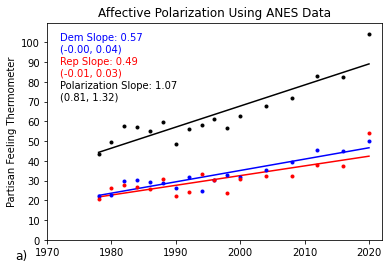

In [55]:

#####
x = np.array([int(a) for a in dict(avg_datap).keys()])
y = list(dict(avg_datap).values())
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")
mR, bR, _, p, e = st.linregress(x, y)
lci, uci = m - 1.96 * e,  m + 1.96 * e
plt.errorbar(x, y, yerr=list(errorbar.values()), fmt=".", color="black")
data = pd.concat([datap_r, datap_d])
number_of_responses_by_year_d = datap_d.groupby("year").size()
number_of_responses_by_year_r = datap_r.groupby("year").size()
errorbar_d = {}
errorbar_r = {}
for d in datap_d.values:
    year = int(d[1])
    weight = d[4]
    if year not in errorbar_d:
        errorbar_d[year] = 0
    errorbar_d[year] += np.square(weight / number_of_responses_by_year_d[year]) * avg_datap_d[year]

for d in datap_r.values:
    year = int(d[1])
    weight = d[4]
    if year not in errorbar_r:
        errorbar_r[year] = 0
    errorbar_r[year] += np.square(weight / number_of_responses_by_year_r[year]) * avg_datap_r[year]

for year in errorbar_d:
    errorbar_d[year] = np.sqrt(errorbar_d[year])
for year in errorbar_r:
    errorbar_r[year] = np.sqrt(errorbar_r[year])

x_d = np.array([int(a) for a in dict(avg_datap_d).keys()])
x_r = np.array([int(a) for a in dict(avg_datap_r).keys()])
y_d = list(dict(avg_datap_d).values())
y_r = list(dict(avg_datap_r).values())
m_d, b_d = np.polyfit(x_d, y_d, 1)
mR, bR, _, p, e = st.linregress(x, y)
lci_d, uci_d = m_d - 1.96 * e,  m_d + 1.96 * e
m_r, b_r = np.polyfit(x_r, y_r, 1)
mR, bR, _, p, e = st.linregress(x, y)
lci_r, uci_r = m_r - 1.96 * e,  m_r + 1.96 * e
plt.plot(x_d, m_d*x_d + b_d, color="blue")
plt.plot(x_r, m_r*x_r + b_r, color="red")
plt.errorbar(x_d, y_d, yerr=list(errorbar_d.values()), fmt=".", color="blue")
plt.errorbar(x_r, y_r, yerr=list(errorbar_r.values()), fmt=".", color="red")
plt.title("Affective Polarization Using ANES Data")
plt.ylabel("Partisan Feeling Thermometer")
plt.text(1972, 95, f"Dem Slope: {np.round(m_d, 2)}\n({lci_D:.2f}, {uci_D:.2f})", color = 'b')
plt.text(1972, 83, f"Rep Slope: {np.round(m_r, 2)}\n({lci_R:.2f}, {uci_R:.2f})", color = 'r')
plt.text(1972, 71, f"Polarization Slope: {np.round(m, 2)}\n({lci:.2f}, {uci:.2f})", color = 'black')
plt.ylim(0, 110)
plt.yticks(np.arange(0, 110, step=10))
plt.xlim(1970, 2022)
plt.text(1965, -10, "a)", fontsize='large')
plt.show()